# TFM

## Importación de librerías

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lectura de fichero

In [84]:
NOT_DATA = '../simulator/inventario-1anio.csv'

DATA = '../../data/datos_simulacion.csv'

df = pd.read_csv(NOT_DATA).drop(columns=[
    'Unnamed: 0',
    'Tiempo (dia)'
])

display(df)

,Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,"19205,78",-5865,"5999,26","19340,04","19326,56","-13,48","-87,05",1
1,"19326,56",-6050,"5999,01","19275,57","19265,47","-10,1","-95,22",1
2,"19265,47",-5975,"8999,63","22290,1","22292,32","2,22","-93,14",0
3,"22292,32",-5830,"2999,92","19462,24","19463,03","0,79","-93,83",0
4,"19463,03",-6150,"6999,09","20312,12","20309,58","-2,54","-94,66",0
...,...,...,...,...,...,...,...,...
362,"19844,62",-6265,"10069,22","23648,84","23632,38","-16,46","-91,74",1
363,"23632,38",-6225,"6243,88","23651,26","23638,99","-12,27","-99,91",1
364,"23638,99",-6015,"5705,11","23329,1","23330,26","1,16","-98,75",0
365,"23330,26",-6350,"6574,87","23555,13","23554,29","-0,84","-99,98",0


# Limpieza de datos

In [85]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for column in bad_formatted_fields:
    df[column] = df[column].str.replace(',', '.')
    df[column] = pd.to_numeric(df[column])


display(df)

,Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,19205.78,-5865,5999.26,19340.04,19326.56,-13.48,-87.05,1
1,19326.56,-6050,5999.01,19275.57,19265.47,-10.10,-95.22,1
2,19265.47,-5975,8999.63,22290.10,22292.32,2.22,-93.14,0
3,22292.32,-5830,2999.92,19462.24,19463.03,0.79,-93.83,0
4,19463.03,-6150,6999.09,20312.12,20309.58,-2.54,-94.66,0
...,...,...,...,...,...,...,...,...
362,19844.62,-6265,10069.22,23648.84,23632.38,-16.46,-91.74,1
363,23632.38,-6225,6243.88,23651.26,23638.99,-12.27,-99.91,1
364,23638.99,-6015,5705.11,23329.10,23330.26,1.16,-98.75,0
365,23330.26,-6350,6574.87,23555.13,23554.29,-0.84,-99.98,0


## Descripción de campos

In [86]:
df['Fugando combustible'].value_counts(normalize=True)

Fugando combustible
1    0.656676
0    0.343324
Name: proportion, dtype: float64

<!-- TODO -->

## Generación de conjuntos de datos

### _FS1_

In [87]:
FS1 = df.filter(items=['Variacion', 'Fugando combustible'])

display(FS1.head())

,Variacion,Fugando combustible
0,-13.48,1
1,-10.10,1
2,2.22,0
3,0.79,0
4,-2.54,0


### _FS2_

In [88]:
FS2 = df.filter(items=['Variacion Acum.', 'Fugando combustible'])

display(FS2.head())

,Variacion Acum.,Fugando combustible
0,-87.05,1
1,-95.22,1
2,-93.14,0
3,-93.83,0
4,-94.66,0


### _FS3_

In [89]:
FS3 = pd.DataFrame(
    data={
        'Variation over sales': df['Variacion'] / df['Venta (L)'],
        'Fugando combustible': df['Fugando combustible']
    })

display(FS3.head())

,Variation over sales,Fugando combustible
0,0.002298,1
1,0.001669,1
2,-0.000372,0
3,-0.000136,0
4,0.000413,0


### _FS4_

In [90]:
FS4 = pd.DataFrame(
    data={
        'Cumilative variation over sales': (df['Variacion'] / df['Venta (L)']).cumsum(),
        'Fugando combustible': df['Fugando combustible']
    })

display(FS4.head())

,Cumilative variation over sales,Fugando combustible
0,0.002298,1
1,0.003968,1
2,0.003596,0
3,0.003461,0
4,0.003874,0


### _FS5_

In [91]:
FS5 = pd.DataFrame(
    data={
        'Variation over real time': (df['Variacion'] / df['Volumen dep. almacenam. fin. (L)']),
        'Fugando combustible': df['Fugando combustible']
    })

display(FS5.head())

,Variation over real time,Fugando combustible
0,-0.000697,1
1,-0.000524,1
2,0.000100,0
3,0.000041,0
4,-0.000125,0


### _FS6_

In [92]:
FS6 = pd.DataFrame(
    data={
        'Cumulative variation over real time': (df['Variacion'] / df['Volumen dep. almacenam. fin. (L)']).cumsum(),
        'Fugando combustible': df['Fugando combustible']
    })

display(FS6.head())

,Cumulative variation over real time,Fugando combustible
0,-0.000697,1
1,-0.001222,1
2,-0.001122,0
3,-0.001082,0
4,-0.001207,0


### _FS7_

In [93]:
FS7 = pd.DataFrame(
    data={
        'Variation over sales': df['Variacion'] / df['Venta (L)'],
        'Variation over real time': (df['Variacion'] / df['Volumen dep. almacenam. fin. (L)']),
        'Fugando combustible': df['Fugando combustible']
    })

display(FS7.head())

,Variation over sales,Variation over real time,Fugando combustible
0,0.002298,-0.000697,1
1,0.001669,-0.000524,1
2,-0.000372,0.000100,0
3,-0.000136,0.000041,0
4,0.000413,-0.000125,0


### _FS8_

In [94]:
FS8 = pd.DataFrame(
    data={
        'Variation': df['Variacion'],
        'Sales': df['Venta (L)'],
        'Fugando combustible': df['Fugando combustible']
    })

display(FS8.head())

,Variation,Sales,Fugando combustible
0,-13.48,-5865,1
1,-10.10,-6050,1
2,2.22,-5975,0
3,0.79,-5830,0
4,-2.54,-6150,0


### Unificación de conjuntos de datos

In [95]:
project_datasets = [
    FS1,
    FS2,
    FS3,
    FS4,
    FS5,
    FS6,
    FS7,
    FS8,
]

## Preprocesados de datos

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for dataset in project_datasets:
    for column in dataset.columns:
        if column == 'Fugando combustible':
            continue
        dataset[column] = MinMaxScaler().fit_transform(dataset[[column]])

## Implementación de modelos

In [97]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping

OBJECTIVE_VARIABLE = 'Fugando combustible'

conf_matrix_list = []

model_history = None

for i, dataset in enumerate(project_datasets[:1]):

    X_train, X_test, y_train, y_test = train_test_split(
        dataset.drop(columns=OBJECTIVE_VARIABLE),
        dataset[OBJECTIVE_VARIABLE],
        stratify=dataset[OBJECTIVE_VARIABLE]
    )

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 4,
        validation_data = (X_test, y_test),
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1)],
        verbose = 1
    )

    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)
    conf_matrix_list.append(confusion_matrix(y_test, y_pred))

    print(f'Accuracy (FS{i + 1}): {accuracy_score(y_test, y_pred):.4f}')

    model_history = history

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6327 - loss: 0.6971 - val_accuracy: 0.6522 - val_loss: 0.6832
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6955 - loss: 0.6741 - val_accuracy: 0.6522 - val_loss: 0.6626
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6599 - loss: 0.6576 - val_accuracy: 0.6522 - val_loss: 0.6371
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.6655 - loss: 0.6325 - val_accuracy: 0.6522 - val_loss: 0.6044
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6452 - loss: 0.6055 - val_accuracy: 0.8152 - val_loss: 0.5642
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.7967 - loss: 0.5649 - val_accuracy: 0.9348 - val_loss: 0.5189
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9179 - loss: 0.5134 - val_accuracy: 0.9565 - val_loss: 0.4687
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9534 - loss: 0.4807 - val_accuracy: 0.9674 - val_l

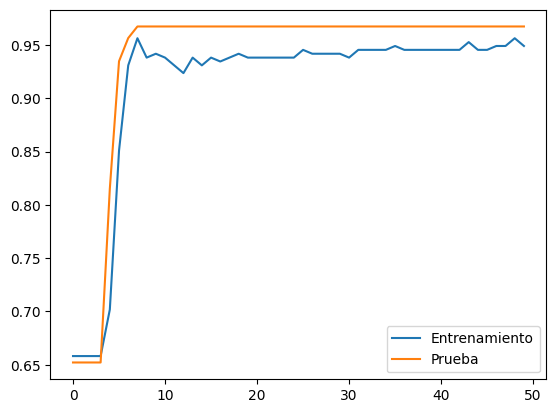

In [98]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Prueba')
plt.legend()

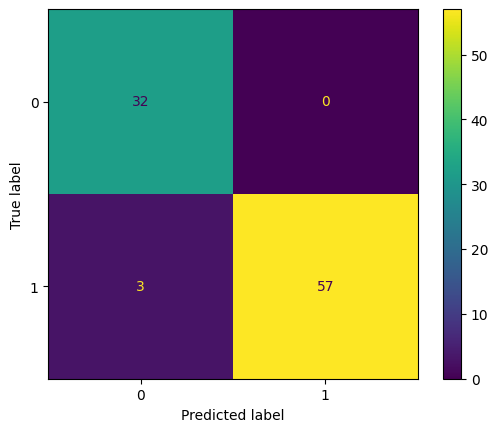

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(conf_matrix_list[2]).plot()